<a href="https://colab.research.google.com/github/stswee/IntroCompStatsHSSP2023/blob/main/Mini_Projects/Intro_to_Comp_Statistics_Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computational Statistics (HSSP 2023 Edition)
## Mini-Project 3: Running Simulations

In this mini-project, you will expand on the in-class activities and run Monte Carlo simulations on your own. You will also perform bootstrapping to analyze a statistical problem.

### Monte Carlo Simulation

#### Exercise 1

In class, we estimated the value of π using a quarter circle. Now, what happens when we use a half circle or a whole circle (or some other fraction of a circle)?

The code below is the same as the one shown in class. Modify the code below to estimate π using a half circle, then a whole circle. If may be easier to modify the plotting code first to see if you are on the right track.

How fast do the errors converge to 0?

Bonus: Can you explain why the rate of convergence is faster/slower? (Hint: think about how variance is calculated)

In [ ]:
# Load in packages
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Run Monte Carlo Simulation (no plot)
num_points = 10000

# Keep track of number of points
circle_points = 0
square_points = 0

# Generate points
for i in range(num_points):
  # Generate random x and y values
  x = random.uniform(0, 1) # Modify me!
  y = random.uniform(0, 1) # Modify me!

  # Determine distance from origin
  d = math.sqrt(x**2 + y**2)

  # If distance is less than 1, then the point is inside the quarter-circle
  if (d <= 1):
    circle_points += 1

  # Increase number of square points
  square_points += 1

  # Generate estimate for pi every 1000 points
  if ((i % 1000) == 0):
    pi = round(4 * circle_points / square_points, 4)
    error = round(math.pi - pi, 4)
    print("The estimate of pi is " + str(float(pi)) + " with an error of " + str(float(error)))


In [ ]:
# Run Monte Carlo Simulation (with plot)
num_points = 100000

# Keep track of number of points
circle_points = 0
square_points = 0

# Store points
circle_storage = np.empty([0, 2])
square_storage = np.empty([0, 2])

# Generate points
for i in range(num_points):
  # Generate random x and y values
  x = random.uniform(-1, 1) # Modify me!
  y = random.uniform(-1, 1) # Modify me!

  # Determine distance from origin
  d = math.sqrt(x**2 + y**2)

  # If distance is less than 1, then the point is inside the quarter-circle
  if (d <= 1):
    circle_points += 1
    circle_storage = np.append(circle_storage, [[x, y]], axis = 0)
  else:
    square_storage = np.append(square_storage, [[x, y]], axis = 0)

  # Increase number of square points
  square_points += 1

  # Generate a plot for pi every 10000 points
  if ((i % 10000) == 0):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(circle_storage[:,0], circle_storage[:,1], s=5, c='r', marker="o", label='circle')
    ax1.scatter(square_storage[:,0], square_storage[:,1], s=5, c='b', marker="o", label='square')
    plt.legend(loc='upper left')
    plt.show()


#### Exercise 2

Monte Carlo simulations can also be used to estimate the area under the curve. Below is a graph of f(x) = x^2 on the interval [-2, 2].

Should you solve for the area under the curve exactly (using calculus), you would get an area of 16/3, or approximately 5.333.

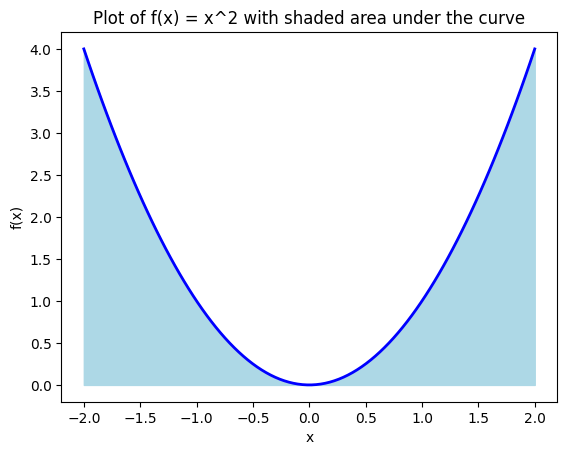

In [ ]:
def f(x):
    return x ** 2

x = np.linspace(-2, 2, 100)  # Interval [-2, 2]
y = f(x)

plt.plot(x, y, 'b-', linewidth=2)  # Plot the function f(x) = x^2

# Shade the area under the curve in the interval [-2, 2]
x_fill = np.linspace(-2, 2, 100)
y_fill = f(x_fill)
plt.fill_between(x_fill, y_fill, color='lightblue')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x^2 with shaded area under the curve')
plt.show()


Write code for a Monte Carlo simulation to estimate the area under the curve.

In [ ]:
# Write your code here
# Hint: It is a great idea to reuse code from before to help you out